This Notebook will find optimal wieghts using MPT, then will back test those wieghts 1 year fowrad from data collections

In [1]:
import time
import os 
import sys

from datetime import datetime
from dateutil.relativedelta import relativedelta

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
print(f'Current Working Directory: {os.getcwd()}')

from utils.config import PROGRAM_START_DATE, PROGRAM_END_DATE, mpt_stocks_for_profit, mpt_stocks_for_sharpe
from utils.finance_utils import backtest_portfolio, plot_cum_ret
from utils.models import MonteCarloSim

Current Working Directory: /Users/blakeuribe/Desktop/portfolio_py/notebooks
Updated on 06/12/2025 3:11 2025-07-12

---------------------------------
finance_utils.py successfully loaded, updated on 07/12/2025 2:57
---------------------------------



---------------------------------
models.py successfully loaded, updated last June. 15 2025 4:55
---------------------------------




Get Back Test Dates

In [2]:
start_time = time.time() # measure run time

date_obj = datetime.strptime(PROGRAM_END_DATE, "%Y-%m-%d")  # Convert string to datetime objectb
backtest_end = date_obj + relativedelta(years=1)

backtest_start = PROGRAM_END_DATE


Conduct MPT

MOVED MODEL TO model.py, and renamed as monter carlo sim

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


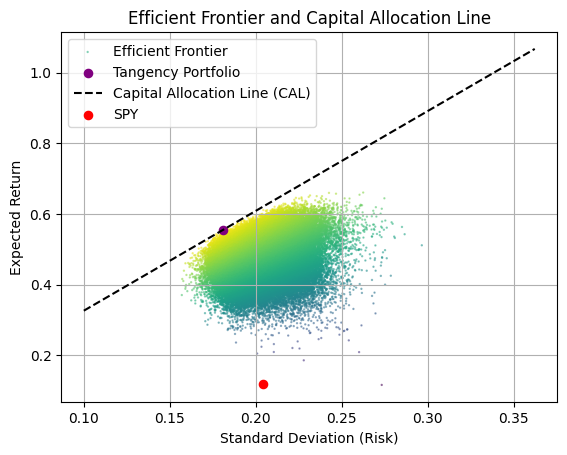

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

-- Optimal Portfolio (CAL) --
Max Sharpe Ratio: 2.82
Corresponding Return: 0.56
Corresponding Standard Deviation: 0.18
Optimal Weights: {'LRN': np.float64(0.19454016608720268), 'MGY': np.float64(0.058424422511740584), 'KGC': np.float64(0.17382629350885057), 'ABT': np.float64(0.2304889463774051), 'ATGE': np.float64(0.05250394091928495), 'OMAB': np.float64(0.15362905014117628), 'FINV': np.float64(0.003382718373374856), 'IDCC': np.float64(0.13320446208096498)}

--MPT on High Sharpe--


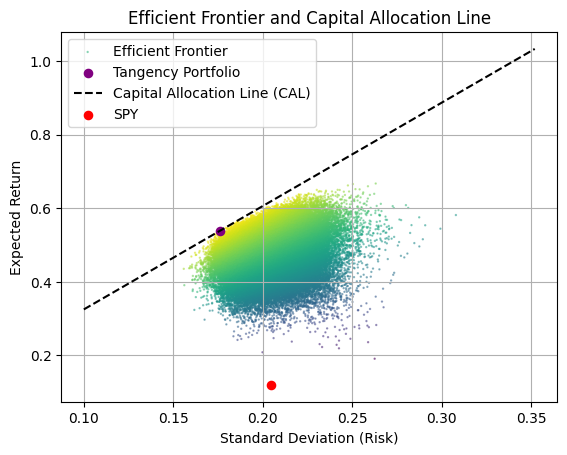

-- Optimal Portfolio (CAL) --
Max Sharpe Ratio: 2.81
Corresponding Return: 0.54
Corresponding Standard Deviation: 0.18
Optimal Weights: {'LRN': np.float64(0.21949707248680198), 'MGY': np.float64(0.06499647187588597), 'KGC': np.float64(0.15258177045215351), 'ABT': np.float64(0.21109827719787652), 'ATGE': np.float64(0.04966582374032946), 'OMAB': np.float64(0.14219180524112213), 'FINV': np.float64(0.004065798404829776), 'IDCC': np.float64(0.15590298060100066)}


In [3]:
# print('--MPT on High Profit--')
optimizer_for_high_profit = MonteCarloSim(mpt_stocks_for_profit, start_date=PROGRAM_START_DATE, end_date=PROGRAM_END_DATE)
optimizer_for_high_profit.simulate_portfolios()
optimizer_for_high_profit.plot_efficient_frontier()
tangecy_portfolio_for_profit_stocks = optimizer_for_high_profit.find_tangency_portfolio()

print('\n--MPT on High Sharpe--')
optimizer_for_high_sharpe = MonteCarloSim(mpt_stocks_for_sharpe, start_date=PROGRAM_START_DATE, end_date=PROGRAM_END_DATE)
optimizer_for_high_sharpe.simulate_portfolios()
optimizer_for_high_sharpe.plot_efficient_frontier()
tangecy_portfolio_for_sharpe_stocks = optimizer_for_high_sharpe.find_tangency_portfolio()


<Axes: >

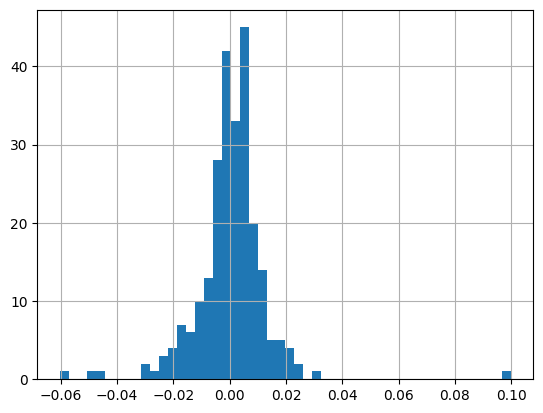

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# pd.Series(optimizer_for_high_sharpe.returns).hist(bins=100)
optimizer_for_high_sharpe.spy_lr['SPY'].hist(bins=50)

<Axes: ylabel='Count'>

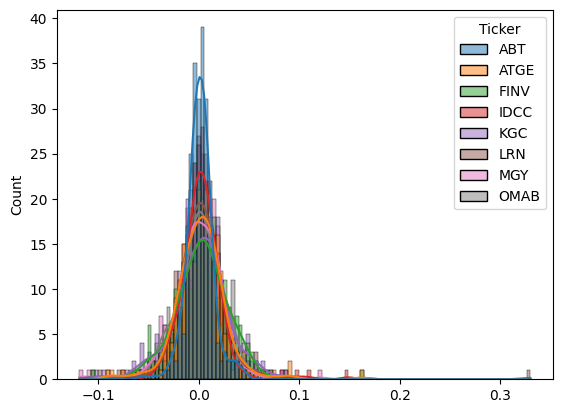

In [5]:
import seaborn as sns

sns.histplot(optimizer_for_high_sharpe.stocks_lr, kde=True)
# sns.displot(optimizer_for_high_sharpe.stocks_lr, kind='hist')
# sns.pairplot(optimizer_for_high_sharpe.stocks_lr, corner=True)

In [6]:
import datetime

program_start_date_obj = datetime.datetime.strptime(backtest_start, '%Y-%m-%d')

# Check if the year is less than 2021
if program_start_date_obj.year < 2021:
    print("Will need to use IRX")
    risk_rate_ticker = '^IRX'
else:
    print("we can use sgov")
    risk_rate_ticker = 'SGOV'

we can use sgov


In [15]:
from utils.finance_utils import find_lending_or_borrowing_portfolio


# Benchmark Metrics
spy_return = optimizer_for_high_sharpe.spy_return.iloc[0]
spy_std = optimizer_for_high_sharpe.spy_std.iloc[0]
risk_free_rate = optimizer_for_high_sharpe.risk_free_rate.iloc[0] # Optimizer uses mean rate

# Info for high profit stocks
stock_weight_dict_profit = tangecy_portfolio_for_profit_stocks[0]
tangecy_portfolio_metrics_dict_profit = tangecy_portfolio_for_profit_stocks[1]

# Info for high profit stocks
stock_weight_dict_sharpe = tangecy_portfolio_for_sharpe_stocks[0]
tangecy_portfolio_metrics_dict_sharpe = tangecy_portfolio_for_sharpe_stocks[1]


# Find lending or borrowing for 
portfolio_allocation_high_profit = find_lending_or_borrowing_portfolio(
    tangecy_portfolio_metrics_dict_profit['Corresponding Return'],
    tangecy_portfolio_metrics_dict_profit['Corresponding Standard Deviation'],
    risk_free_rate,
    spy_std,
    list(stock_weight_dict_profit.keys()),
    list(stock_weight_dict_profit.values()),
    add_margin=True,
    risk_free_proxy=risk_rate_ticker
    )

portfolio_allocation_high_sharpe = find_lending_or_borrowing_portfolio(
    tangecy_portfolio_metrics_dict_sharpe['Corresponding Return'],
    tangecy_portfolio_metrics_dict_sharpe['Corresponding Standard Deviation'],
    risk_free_rate,
    spy_std,
    list(stock_weight_dict_sharpe.keys()),
    list(stock_weight_dict_sharpe.values()),
    add_margin=True,
    risk_free_proxy=risk_rate_ticker
    )
portfolio_allocation_high_sharpe


{'Risky Asset Weight': np.float64(1.1610880015494847),
 'Risk-Free Asset Weight': 'None: Portfolio remains the same, this portfolio std was below Benchmark.',
 'Stocks': ['LRN', 'MGY', 'KGC', 'ABT', 'ATGE', 'OMAB', 'FINV', 'IDCC'],
 'Stock Weights': array([0.25485542, 0.07546662, 0.17716086, 0.24510368, 0.05766639,
        0.1650972 , 0.00472075, 0.18101708]),
 'Expected Portfolio Return': np.float64(0.6251713769332887),
 'Expected Portfolio Standard Deviation': np.float64(0.20428190462991602),
 'Note': 'This is a Margin Portfolio'}

In [8]:
portfolio_allocation_high_sharpe['Stock Weights']

array([0.25485542, 0.07546662, 0.17716086, 0.24510368, 0.05766639,
       0.1650972 , 0.00472075, 0.18101708])

Begin Back Testing

----Begining Back Test----
Back Test starts on: 2025-07-12
Back Test ends on: 2026-07-12 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

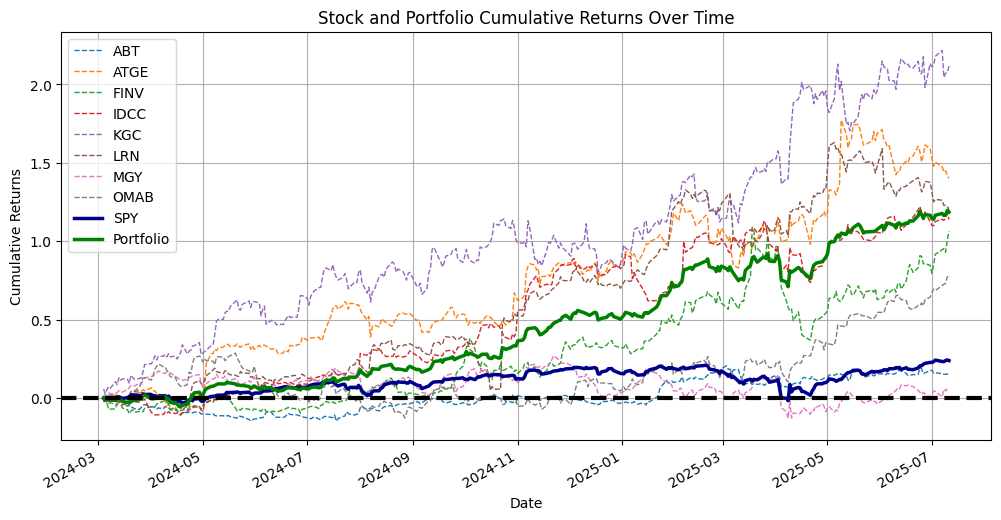

[*********************100%***********************]  9 of 9 completed


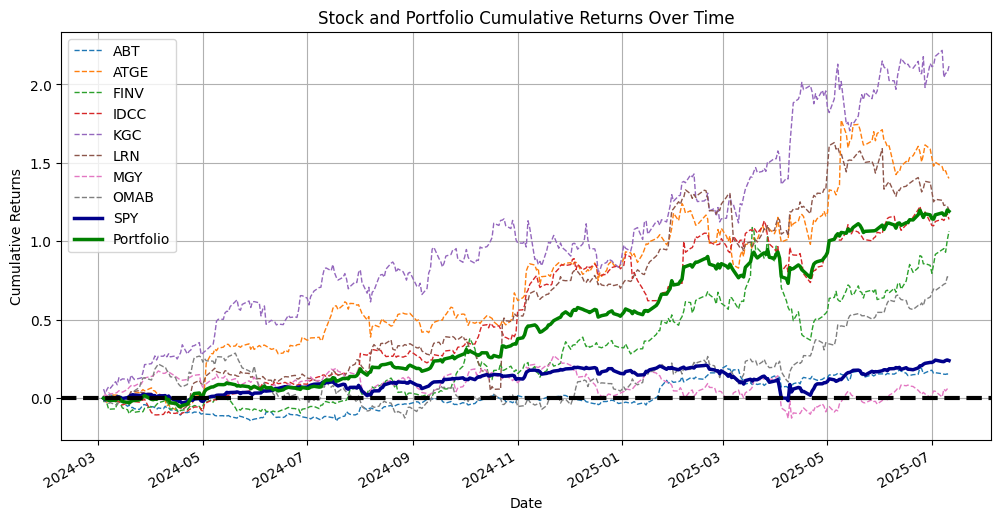

In [9]:

print('----Begining Back Test----')
print(f'Back Test starts on: {backtest_start}')
print(f'Back Test ends on: {backtest_end}')

paper_value = 100_000
backtest_spy_return = backtest_portfolio(['spy'], 1, [1], start_date=backtest_start, end_date=backtest_end)-1

# Run the backtest
backtest_on_high_profit = backtest_portfolio(portfolio_allocation_high_profit['Stocks'], paper_value, portfolio_allocation_high_profit['Stock Weights'], start_date=backtest_start, end_date=backtest_end)
backtest_on_high_sharpe = backtest_portfolio(portfolio_allocation_high_sharpe['Stocks'], paper_value, portfolio_allocation_high_sharpe['Stock Weights'], start_date=backtest_start, end_date=backtest_end)

plot_cum_ret(portfolio_allocation_high_sharpe['Stocks'], portfolio_allocation_high_sharpe['Stock Weights'], start_date='2024-03-01', end_date=backtest_end)
plot_cum_ret(portfolio_allocation_high_profit['Stocks'], portfolio_allocation_high_profit['Stock Weights'], start_date='2024-03-01', end_date=backtest_end)

Record Results

In [10]:
import pandas as pd
import os

# Define file path
file_path = "../data/clean/backtest_results.csv"

# Check if file exists
if os.path.exists(file_path):
    # Load existing data
    backtest_df = pd.read_csv(file_path)
else:
    # Create a new DataFrame if the file doesn't exist
    backtest_df = pd.DataFrame(columns=[
        "Data_Collection_Start", "Data_Collection_End",
        "Backtest_Start", "Backtest_End",
        "Stock_Selection_Method", 'Stocks', 'Sharpe', "Starting_Value", "Ending_Value"
    ])

# New entries to append
new_entries = [
    {
        "Data_Collection_Start": PROGRAM_START_DATE,
        "Data_Collection_End": PROGRAM_END_DATE,
        "Backtest_Start": backtest_start,
        "Backtest_End": backtest_end,
        "Stock_Selection_Method": "High Profit Stocks",
        "Stocks": (",".join(portfolio_allocation_high_profit['Stocks'])),
        'Sharpe': tangecy_portfolio_for_profit_stocks[1]['Max Sharpe'],
        "Starting_Value": paper_value,
        "Ending_Value": backtest_on_high_profit,
        'SPY Retrun': backtest_spy_return
    },
    {
        "Data_Collection_Start": PROGRAM_START_DATE,
        "Data_Collection_End": PROGRAM_END_DATE,
        "Backtest_Start": backtest_start,
        "Backtest_End": backtest_end,
        "Stock_Selection_Method": "High Sharpe Ratio Stocks",
        "Stocks": (",".join(portfolio_allocation_high_sharpe['Stocks'])),
        'Sharpe': tangecy_portfolio_for_sharpe_stocks[1]['Max Sharpe'],
        "Starting_Value": paper_value,
        "Ending_Value": backtest_on_high_sharpe,
        'SPY Retrun': backtest_spy_return

    }
]

# Convert new entries to a DataFrame
new_entries_df = pd.DataFrame(new_entries)

# Drop duplicates before writing
backtest_df = pd.concat([backtest_df, new_entries_df], ignore_index=True).drop_duplicates()

# **Append** to the CSV without overwriting
backtest_df.to_csv(file_path, index=False, mode="w")  

print("New rows added successfully (without overwriting)!") 


New rows added successfully (without overwriting)!


In [11]:
backtest_df

,Data_Collection_Start,Data_Collection_End,Backtest_Start,Backtest_End,Stock_Selection_Method,Stocks,Sharpe,Starting_Value,Ending_Value,SPY Retrun
0,2020-01-01,2021-01-01,2021-01-01,2022-01-01,High Profit Stocks,"ASML,CM,RMD,BKNG,HSBC,TGT,CNQ,GE,SGOV",0.936087,100000,140446.180568,0.305054
1,2020-01-01,2021-01-01,2021-01-01,2022-01-01,High Sharpe Ratio Stocks,"AAPL,TGT,HSBC,CNQ,BKNG,BIDU,NTES,TXN,SGOV",1.276404,100000,123186.626152,0.305054
2,2021-01-01,2022-01-01,2022-01-01,2023-01-01 00:00:00,High Profit Stocks,"CVS,GOOGL,AVB,SRE,COST,PLD,PAYX,NSC,SGOV",3.771514,100000,83619.108449,-0.186464
3,2021-01-01,2022-01-01,2022-01-01,2023-01-01 00:00:00,High Sharpe Ratio Stocks,"CVS,GOOGL,AVB,SRE,COST,PLD,PAYX,NSC,SGOV",3.753662,100000,86655.415285,-0.186464
4,2023-01-01,2024-01-01,2024-01-01,2025-01-01 00:00:00,High Profit Stocks,"FMX,RCL,ANET,SPOT,NVDA,META,LRCX,PDD,SGOV",3.673949,100000,147782.071485,0.255893
5,2023-01-01,2024-01-01,2024-01-01,2025-01-01 00:00:00,High Sharpe Ratio Stocks,"FMX,RCL,SPOT,AAPL,NVDA,META,PDD,UNP,SGOV",3.681698,100000,141059.803272,0.255893
6,2024-01-01,2025-01-01,2025-01-01,2026-01-01 00:00:00,High Profit Stocks,"K,NVDA,NFLX,BSX,SYF,VST,BK,GDDY",4.072436,100000,106058.921918,0.021500
7,2024-01-01,2025-01-01,2025-01-01,2026-01-01 00:00:00,High Sharpe Ratio Stocks,"K,NVDA,NFLX,BSX,SYF,VST,BK,GDDY",4.097686,100000,110873.151203,0.021500
8,2024-03-01,2025-03-01,2025-03-01,2026-03-01 00:00:00,High Profit Stocks,"BABA,GDDY,CQP,DUK,SYF,BKNG,VST,GRMN",2.951397,100000,99001.022710,-0.001216
9,2024-03-01,2025-03-01,2025-03-01,2026-03-01 00:00:00,High Sharpe Ratio Stocks,"BABA,GDDY,CQP,DUK,K,BKNG,VST,GRMN",3.473431,100000,117355.253744,-0.001216


In [12]:
import numpy as np

chosen_portfolio = {
    k: float(v) if isinstance(v, np.floating) else
       v.tolist() if isinstance(v, np.ndarray) else
       v
    for k, v in portfolio_allocation_high_sharpe.items() # change this vairble based on your prefeneces, and analysis
}

config_path = '../utils/config.py'

# Read current config
with open(config_path, 'r') as file:
    lines = file.readlines()

# Check if chosen_portfolio is already defined
portfolio_exists = any('chosen_portfolio' in line for line in lines)

# Append only if it doesn't exist
if not portfolio_exists:
    with open(config_path, 'a') as file:
        file.write('\n# New Entry from backtesting.ipynb')
        file.write(f'\nchosen_portfolio = {chosen_portfolio}\n')
        print('chosen_portfolio succesfully added')
else:
    print("chosen_portfolio is already defined in config.py")


chosen_portfolio succesfully added


In [13]:
len(chosen_portfolio['Stock Weights'])

8